In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
donor_df = pd.read_csv('donor_df_', sep=';')
donor_df

,fund_id,returned,gateway,multiple_country,russia,country,region,recurring,4_status,5_status,target
0,e3fd213a01aee164f475152137a83eec,0,robokassa,0,0,Неизвестно,Неизвестно,0,0.0,0.0,1
1,e3fd213a01aee164f475152137a83eec,0,cloudpayments,0,1,Россия,Калининградская область,0,0.0,0.0,1
2,e3fd213a01aee164f475152137a83eec,0,cloudpayments,0,1,Россия,Москва,1,0.0,1.0,1
3,e3fd213a01aee164f475152137a83eec,0,BANKOCEAN2,0,0,Неизвестно,Неизвестно,0,0.0,0.0,1
4,e3fd213a01aee164f475152137a83eec,0,BANKOCEAN2,0,0,Неизвестно,Неизвестно,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
171855,9161f2362b847ca9307ca394431ead09,0,cloudpayments,0,1,Россия,Россия,0,0.0,0.0,0
171856,c06d416f1b315dc3c09b281168df1a4f,0,cloudpayments,0,1,Россия,Москва,0,0.0,0.0,0
171857,9161f2362b847ca9307ca394431ead09,0,cloudpayments,0,1,Россия,Россия,0,0.0,0.0,0
171858,83be2f1da8156fc8e6ebaa5fe6133ab1,0,mixplat,0,1,Россия,Удмуртия,1,0.0,0.0,0


In [3]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171860 entries, 0 to 171859
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fund_id           171860 non-null  object 
 1   returned          171860 non-null  int64  
 2   gateway           171860 non-null  object 
 3   multiple_country  171860 non-null  int64  
 4   russia            171860 non-null  int64  
 5   country           171860 non-null  object 
 6   region            171860 non-null  object 
 7   recurring         171860 non-null  int64  
 8   4_status          171860 non-null  float64
 9   5_status          171860 non-null  float64
 10  target            171860 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 14.4+ MB


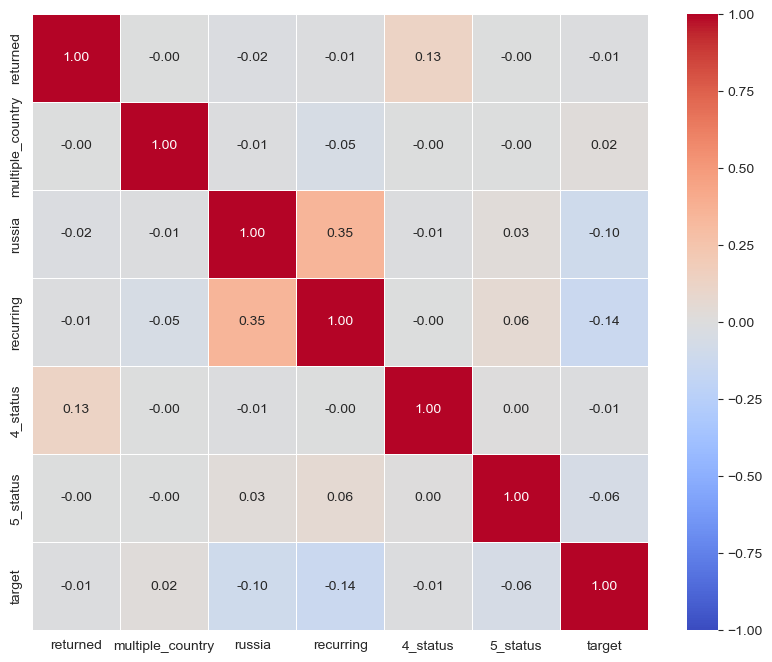

In [4]:
corr_matrix = donor_df.drop(columns=['fund_id', 'gateway', 'country', 'region']).corr()  

plt.figure(figsize=(10, 8)) 
sns.set_style("whitegrid")    # cетка на фоне

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,            # Показывать значения в ячейках
    fmt=".2f",             # Формат чисел (2 знака после запятой)
    cmap="coolwarm",       # Цветовая схема (coolwarm, viridis, magma)
    vmin=-1, vmax=1,       # Диапазон значений для цветовой шкалы
    linewidths=0.5,        # Ширина линий между ячейками
    square=True            # Квадратные ячейки
)

plt.show()

In [7]:
donor_df.describe()

,returned,multiple_country,russia,recurring,4_status,5_status,target
count,171860.000000,171860.000000,171860.000000,171860.000000,171860.000000,171860.000000,171860.000000
mean,0.000087,0.002060,0.902048,0.691848,0.001007,0.635116,0.531078
std,0.009342,0.045339,0.297250,0.461731,0.077222,7.246359,0.499035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,11.000000,184.000000,1.000000


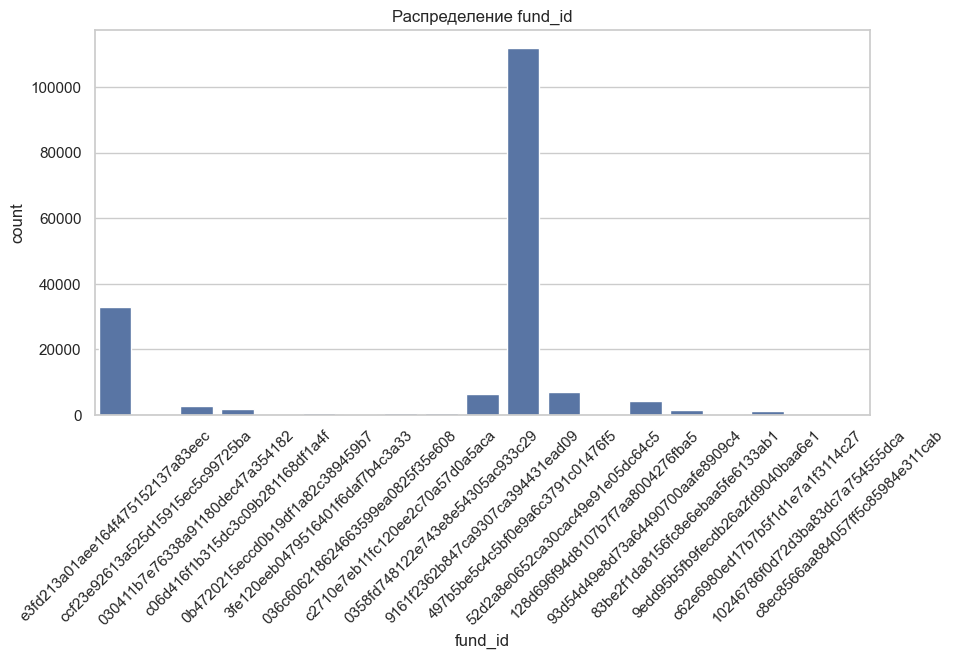

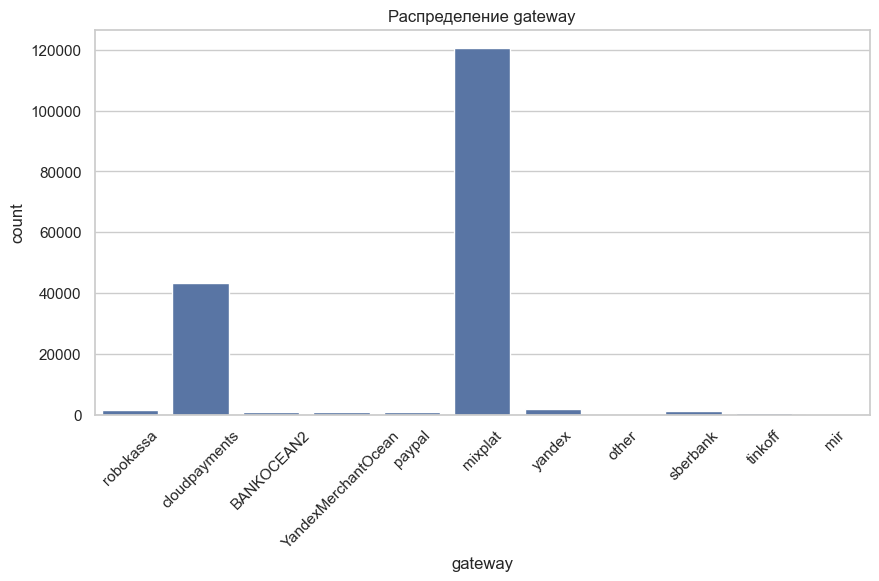

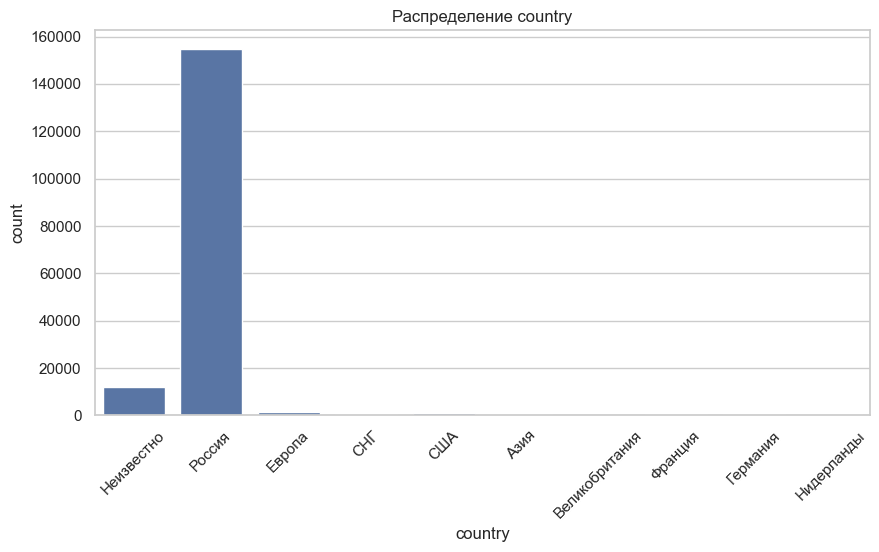

In [11]:
for column in ['fund_id', 'gateway', 'country']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=donor_df, x=column)
    plt.title(f'Распределение {column}')
    plt.xticks(rotation=45)
    plt.show()

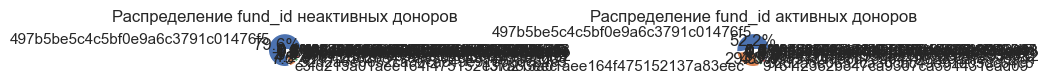

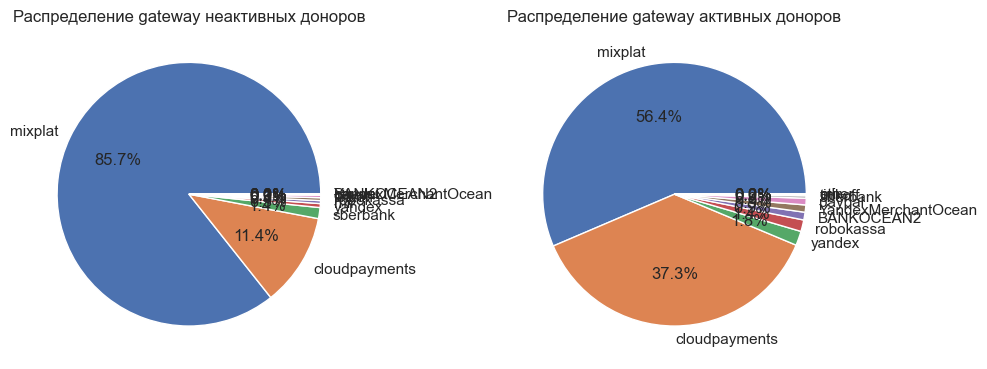

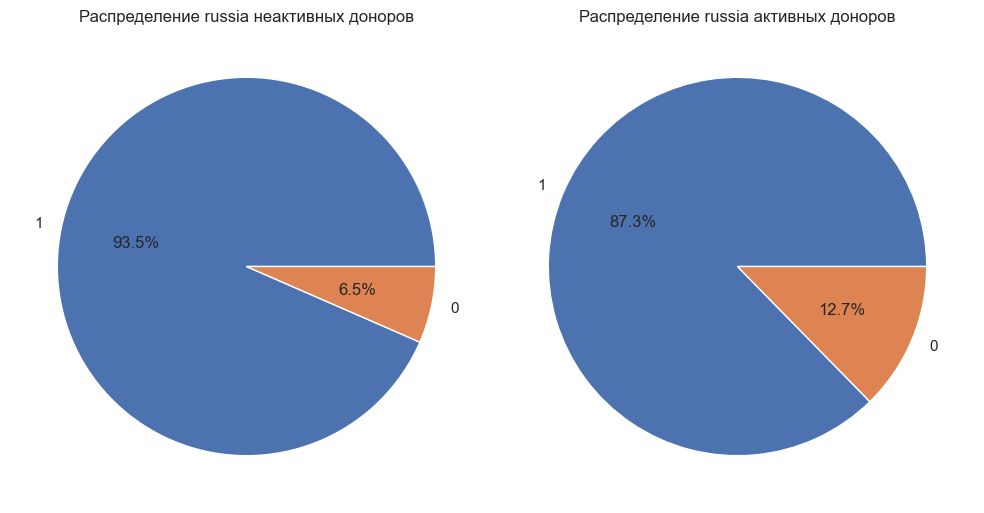

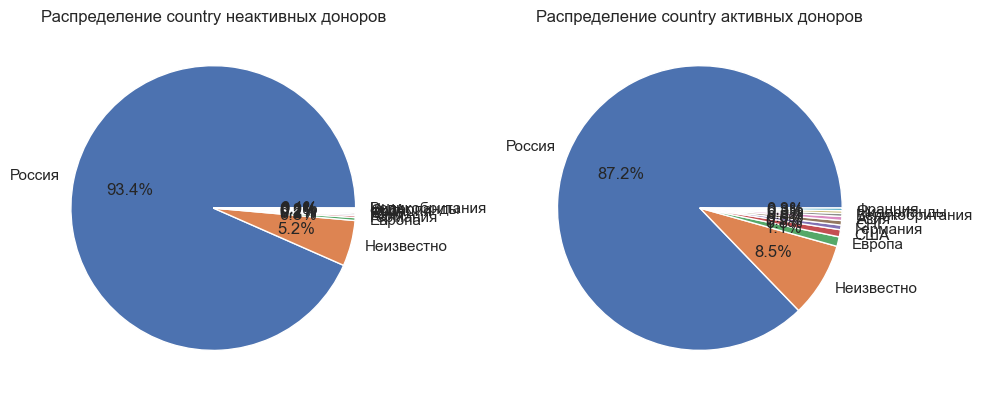

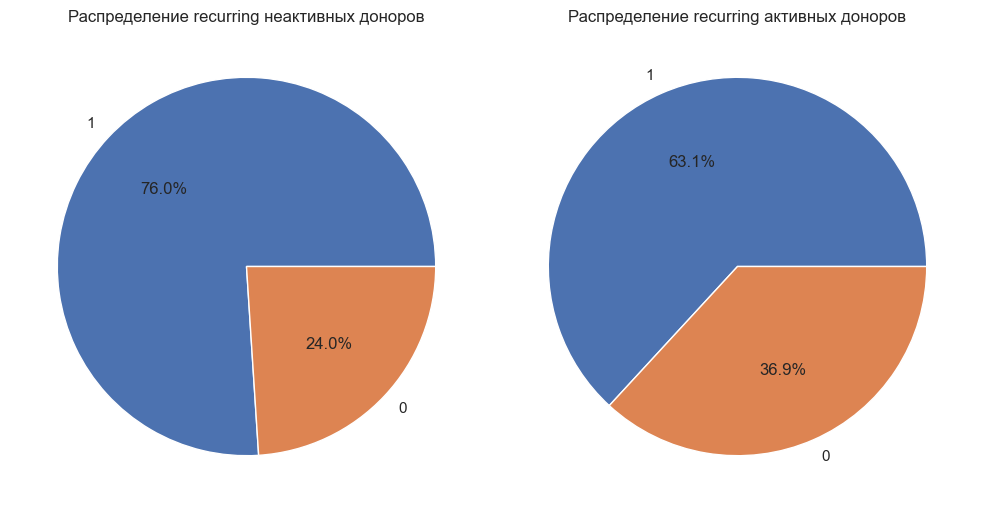

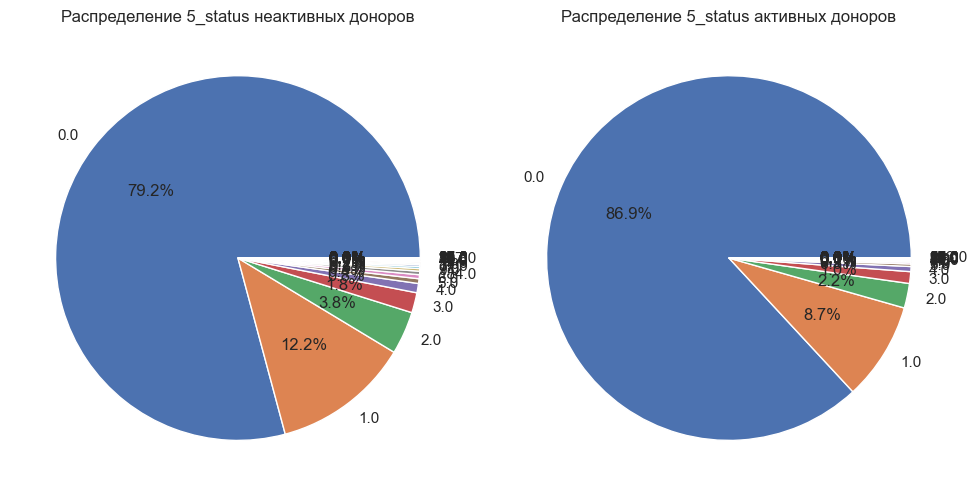

In [16]:
temp0 = donor_df[donor_df.target==0]
temp1 = donor_df[donor_df.target==1]

for col in ['fund_id',  'gateway', 'russia', 'country', 'recurring', '5_status']:
    
    inactive_counts = temp0[f'{col}'].value_counts()
    active_counts = temp1[f'{col}'].value_counts()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

    ax1.pie(inactive_counts, labels=inactive_counts.index, autopct='%1.1F%%')
    ax1.set_title(f"Распределение {col} неактивных доноров")

    ax2.pie(active_counts, labels=active_counts.index, autopct='%1.1F%%')
    ax2.set_title(f"Распределение {col} активных доноров")

    plt.tight_layout()
    plt.show()

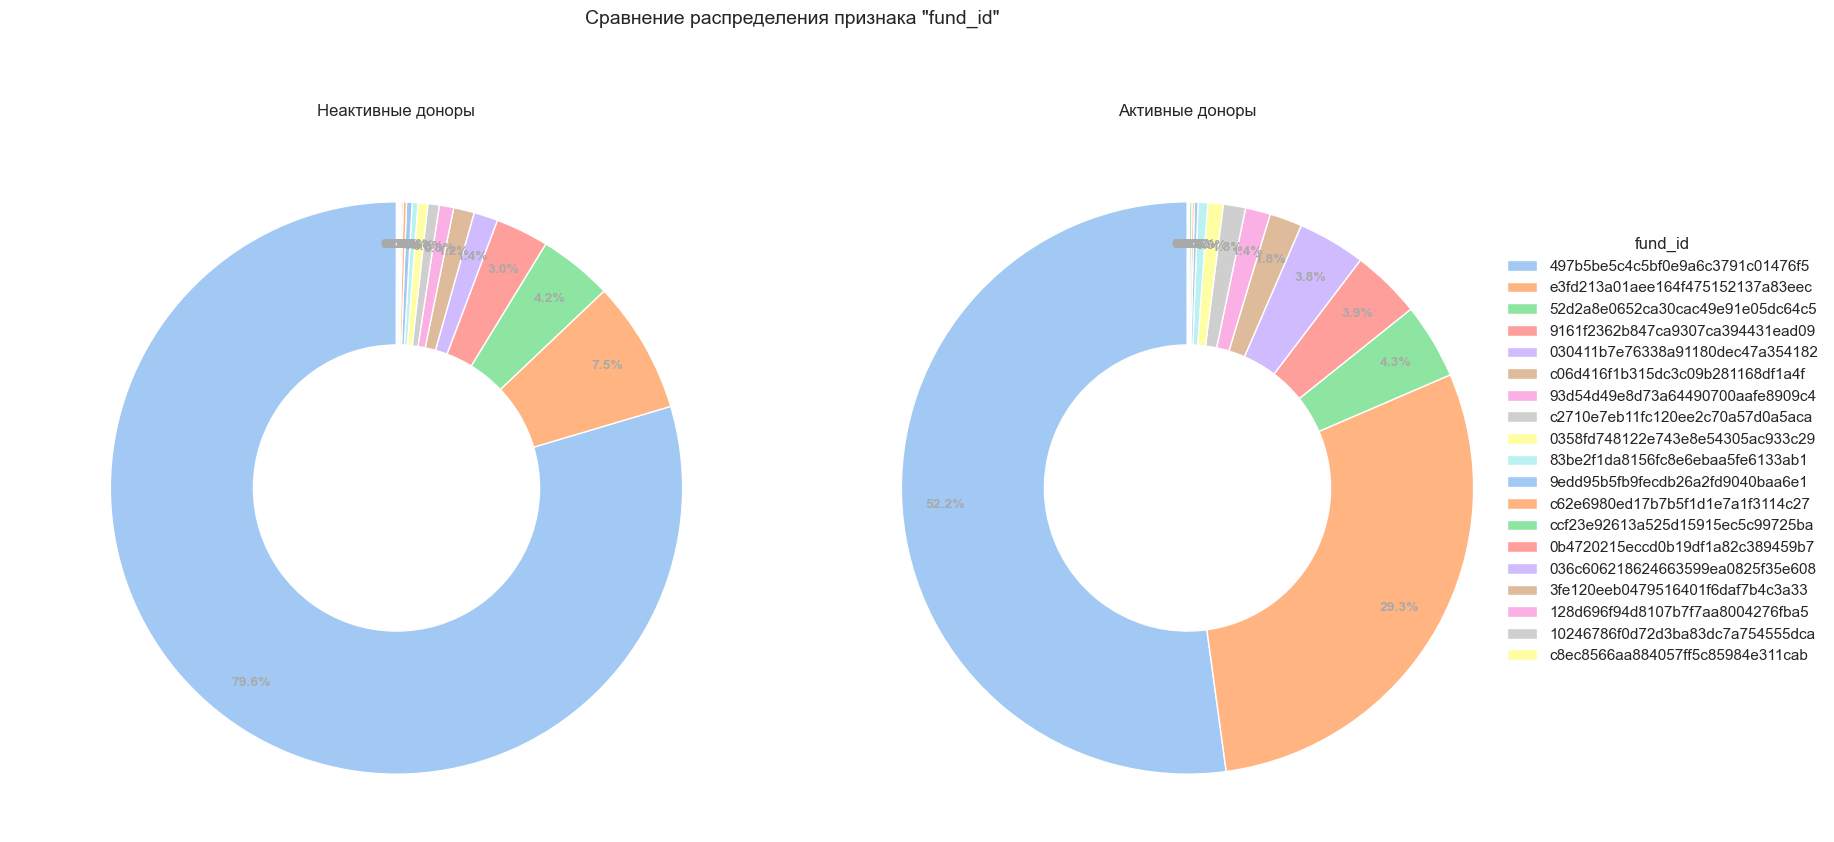

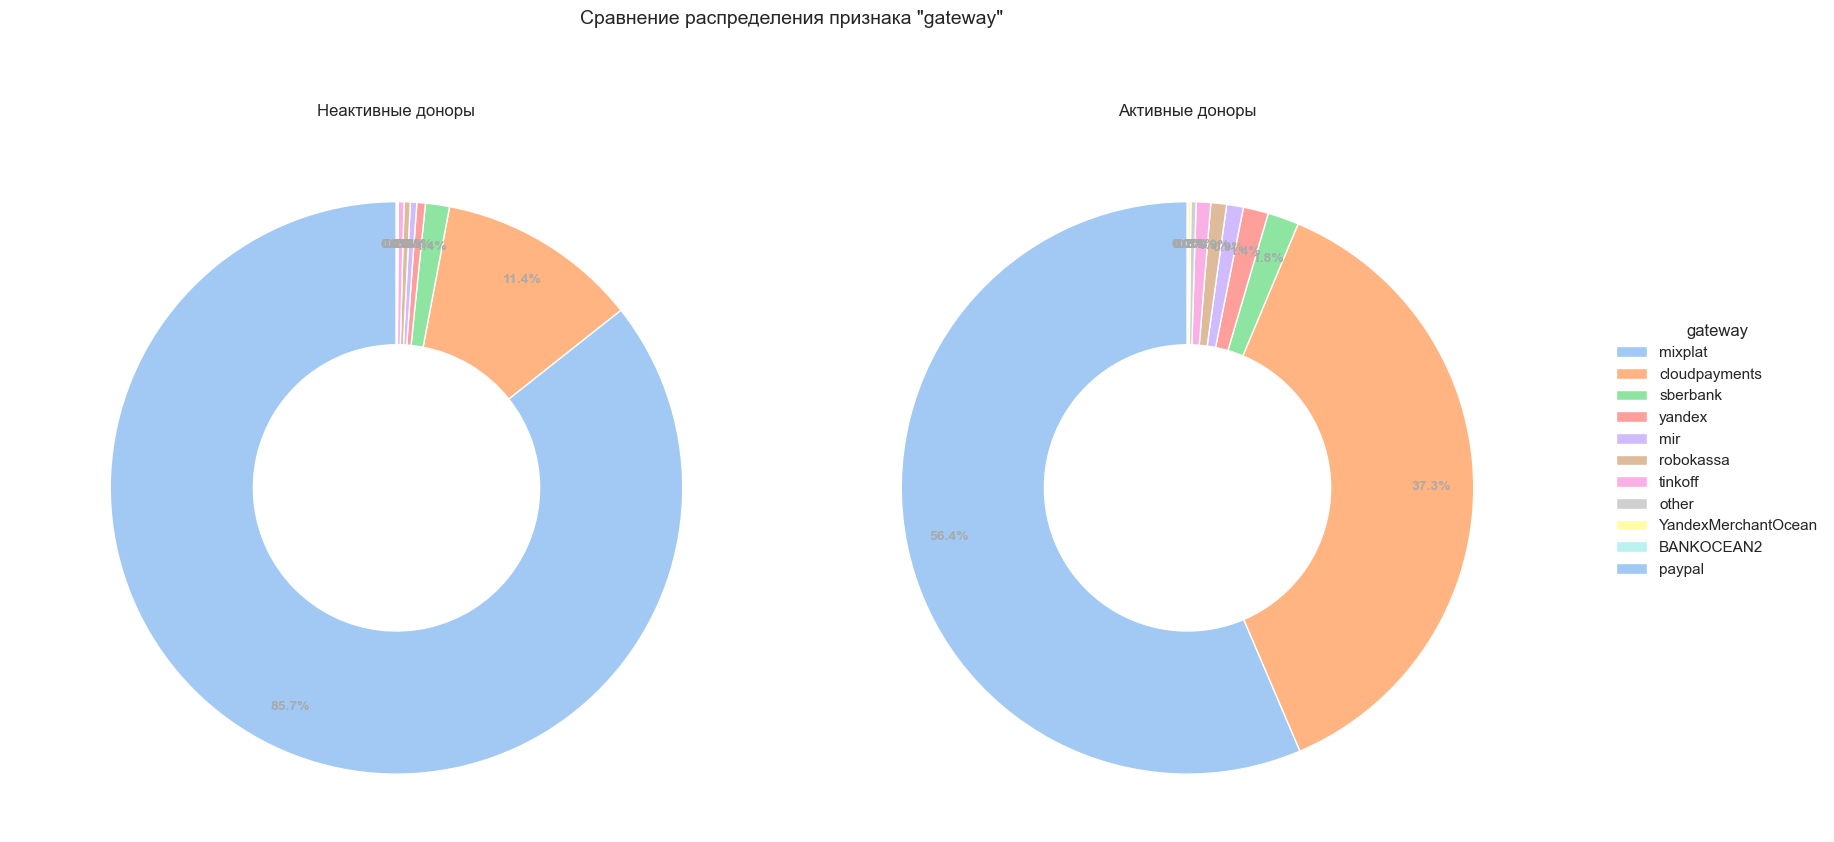

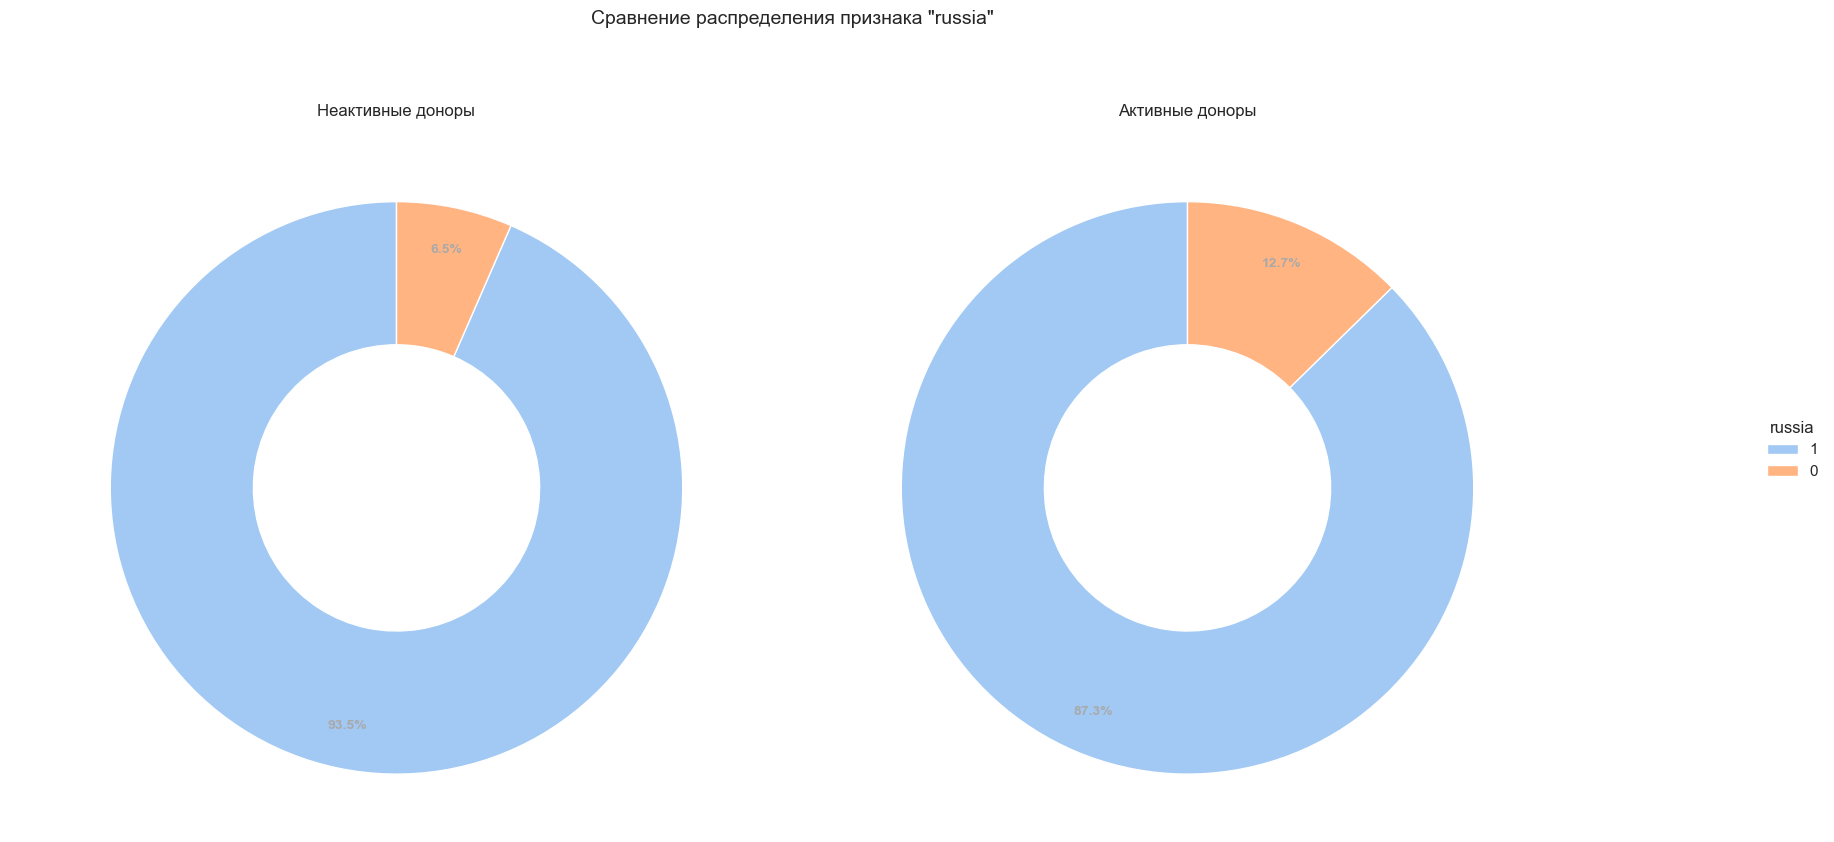

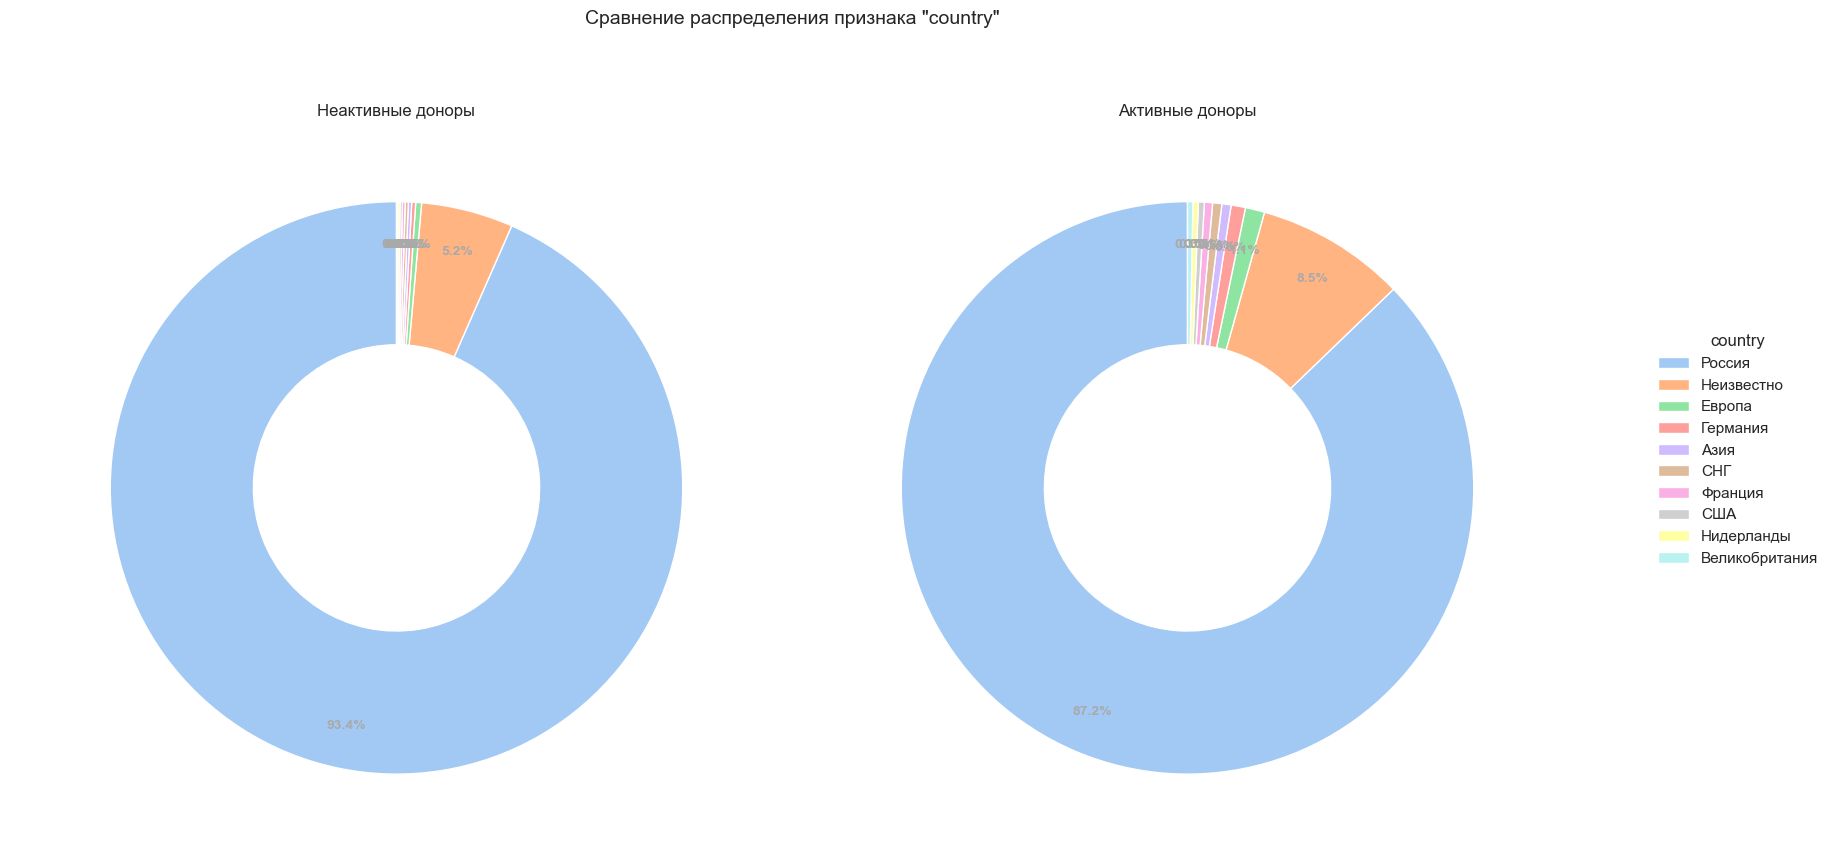

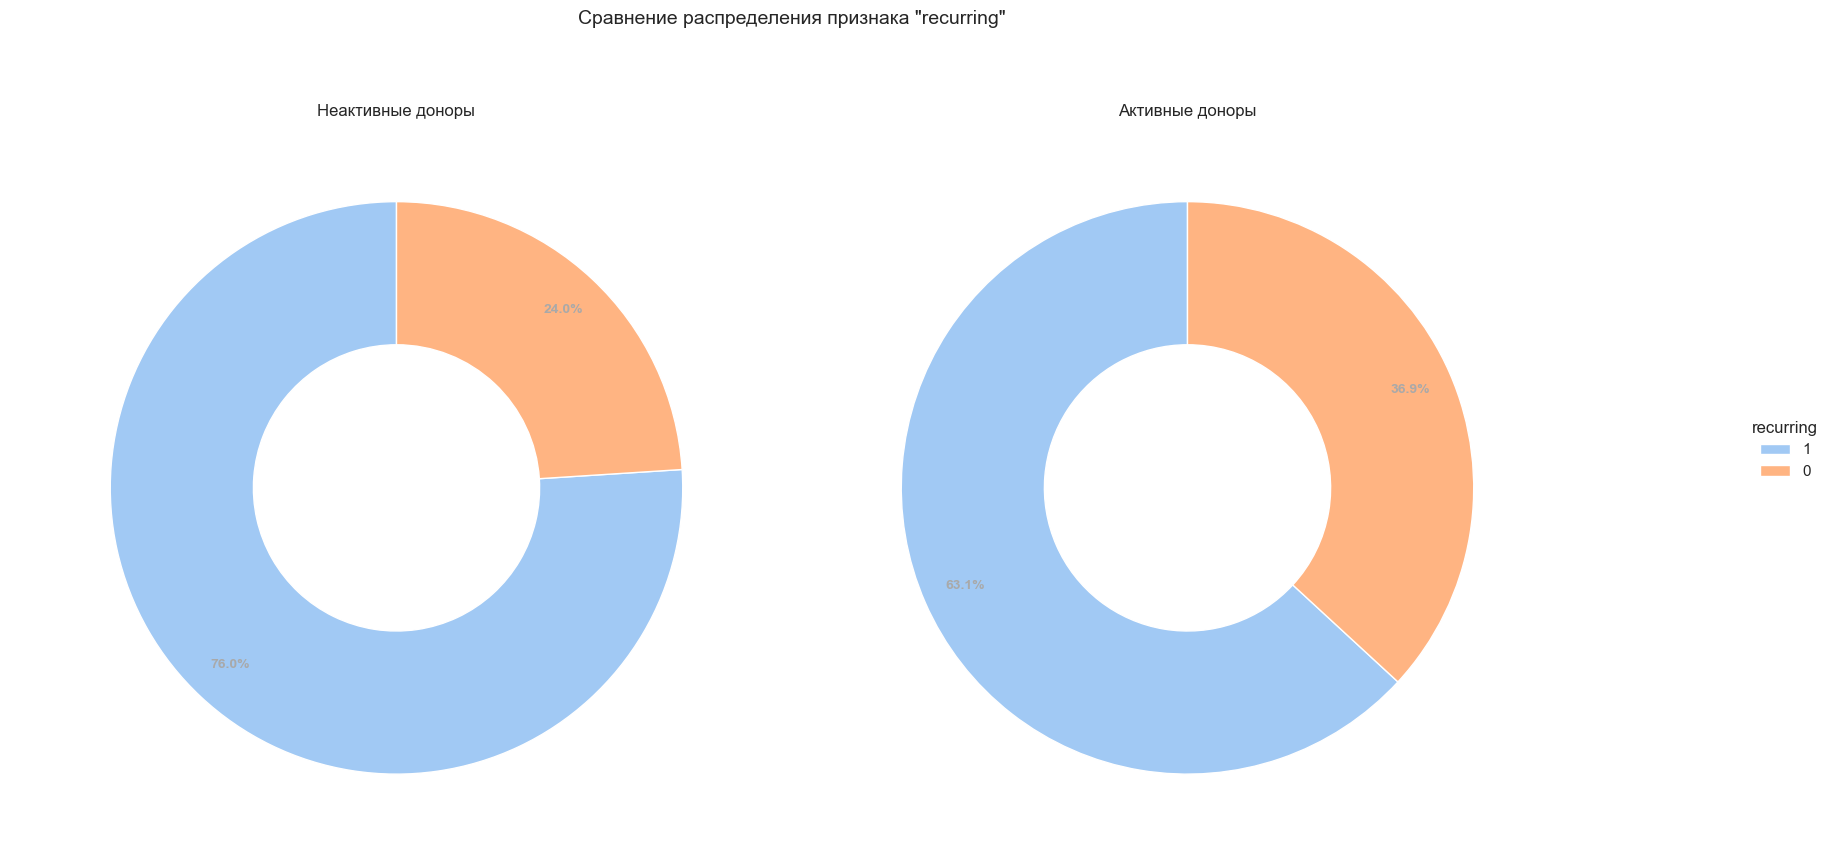

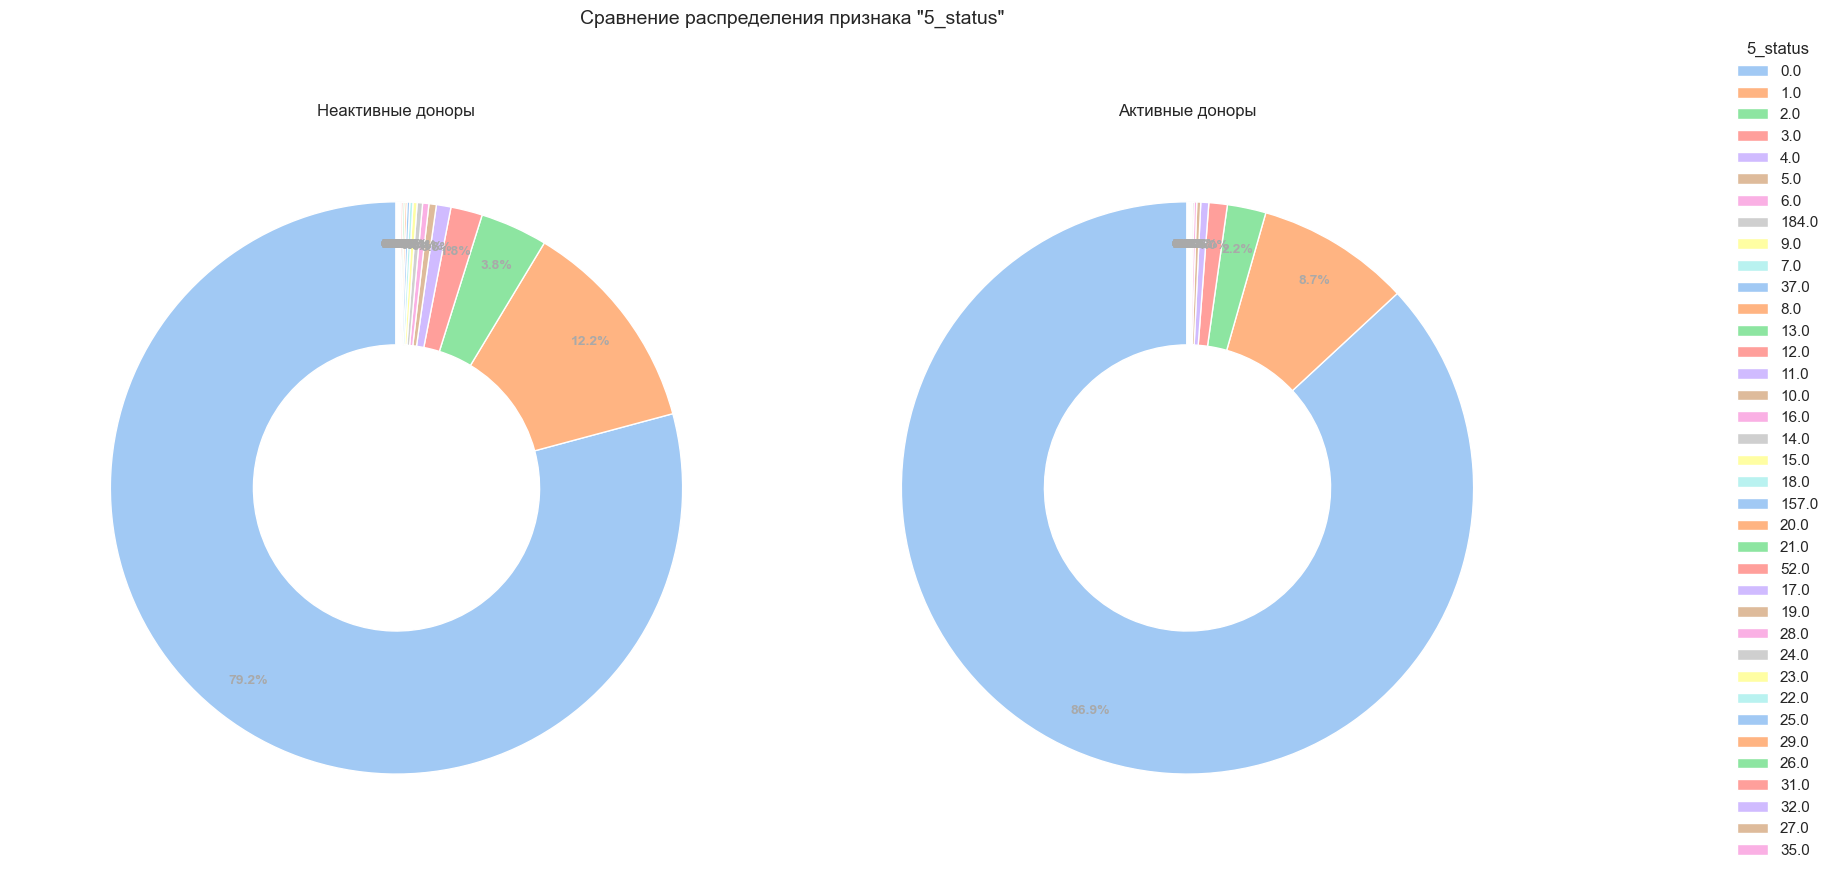

In [17]:
sns.set_style("whitegrid")
palette = sns.color_palette("pastel")

# Разделяем данные
temp0 = donor_df[donor_df.target == 0]
temp1 = donor_df[donor_df.target == 1]

for col in ['fund_id', 'gateway', 'russia', 'country', 'recurring', '5_status']:
    # Получаем данные для графиков
    inactive_counts = temp0[col].value_counts()
    active_counts = temp1[col].value_counts()
    
    # Создаем фигуру с двумя подграфиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle(f'Сравнение распределения признака "{col}"', y=1.05, fontsize=14)
    
    # Первый график - неактивные доноры
    wedges1, texts1, autotexts1 = ax1.pie(
        inactive_counts,
        labels=None,  # Убираем стандартные labels для более аккуратного отображения
        autopct='%1.1f%%',
        startangle=90,
        colors=palette,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        pctdistance=0.85
    )
    ax1.set_title("Неактивные доноры", pad=20)
    
    # Второй график - активные доноры
    wedges2, texts2, autotexts2 = ax2.pie(
        active_counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=palette,
        wedgeprops=dict(width=0.5, edgecolor='w'),
        pctdistance=0.85
    )
    ax2.set_title("Активные доноры", pad=20)
    
    # Добавляем общую легенду
    all_labels = list(inactive_counts.index)  # или active_counts, если они одинаковые
    fig.legend(
        wedges1, 
        all_labels,
        title=col,
        loc='center right',
        bbox_to_anchor=(1.15, 0.5),
        frameon=False
    )
    
    # Улучшаем отображение процентов
    plt.setp(autotexts1, size=10, weight="bold", color='darkgrey')
    plt.setp(autotexts2, size=10, weight="bold", color='darkgrey')
    
    # Делаем графики круглыми
    ax1.axis('equal')
    ax2.axis('equal')
    
    plt.tight_layout()
    plt.show()